Is there a correlation between job or career satisfaction and programming hobby? Let's explore.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import SatisfactionAndHobby as sh
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')

In [2]:
print("The total number of rows in data set is {}.".format(df.shape[0]))

# Check the column JobSatisfaction for missing values.
print("The number of rows with invalid JobSatisfaction is {}."
      .format(sum(df['JobSatisfaction'].isnull())))

The total number of rows in data set is 51392.
The number of rows with invalid JobSatisfaction is 11016.


In [3]:
# Fill in the missing values.
js_median = df[df['JobSatisfaction'].isnull()==False][
    'JobSatisfaction'].median()
print(js_median)
job_satis_df = df.copy()
job_satis_df['JobSatisfaction'].fillna(js_median, inplace=True)
print(sum(job_satis_df['JobSatisfaction'].isnull()))

7.0
0


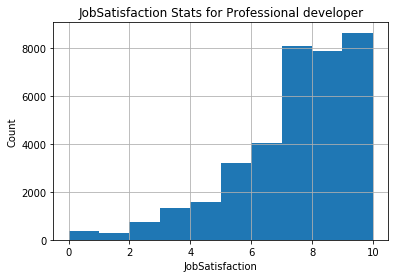

In [4]:
job_satis_df['JobSatisfaction'][
    job_satis_df['Professional']=='Professional developer'].hist(bins=10);
plt.title('JobSatisfaction Stats for Professional developer');
plt.xlabel('JobSatisfaction');
plt.ylabel('Count');

In [5]:
job_satis_df[job_satis_df['Professional']=='Professional developer'].groupby(
    ['ProgramHobby']).median()['JobSatisfaction'].sort_values()

ProgramHobby
No                                           7.0
Yes, I contribute to open source projects    7.0
Yes, I program as a hobby                    7.0
Yes, both                                    7.0
Name: JobSatisfaction, dtype: float64

In [6]:
# Measure the ratio of programming lovers and 
# open source project contributors 
# who have different job satisfaction levels.
hobby_ratios_df = sh.gen_hobby_ratios_df_by_satis('JobSatisfaction',
                                                  job_satis_df)
hobby_ratios_df

,satis,hobby_ratio,contrib_ratio
0.0,0.0,0.710456,0.345845
1.0,1.0,0.716724,0.279863
2.0,2.0,0.730769,0.313187
3.0,3.0,0.708955,0.310448
4.0,4.0,0.723323,0.322045
5.0,5.0,0.694044,0.326646
6.0,6.0,0.716609,0.307048
7.0,7.0,0.730726,0.330281
8.0,8.0,0.733461,0.338422
9.0,9.0,0.750959,0.367199


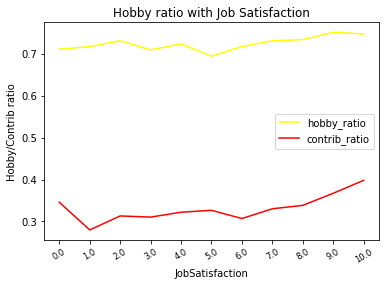

In [7]:
# Let's draw the graph.
x = np.arange(len(hobby_ratios_df['satis']))

# Draw a line chart.
plt.plot(x, hobby_ratios_df['hobby_ratio'], 'yellow')
plt.plot(x, hobby_ratios_df['contrib_ratio'], 'red')
plt.xticks(x, hobby_ratios_df['satis'], size='small',rotation=30)
plt.xlabel('JobSatisfaction')
plt.ylabel('Hobby/Contrib ratio')
plt.title('Hobby ratio with Job Satisfaction')
plt.legend()
plt.show()

We can see that there is a positive correlation between programming hobby and job satisfaction, although this relationship is not obvious. However, the relationship between the contribution of open source projects and job satisfaction will be significantly higher, especially when job satisfaction is above 6.

The following is a statistical analysis of the correlation between career satisfaction and programming hobby.

In [8]:
print("The number of rows with invalid JobSatisfaction is {}."
      .format(sum(df['CareerSatisfaction'].isnull())))

The number of rows with invalid JobSatisfaction is 8697.


In [9]:
# Fill in the missing values.
cs_median = df[df['CareerSatisfaction'].isnull()==False][
    'CareerSatisfaction'].median()
print(cs_median)
career_satis_df = df.copy()
career_satis_df['CareerSatisfaction'].fillna(cs_median, inplace=True)
print(sum(career_satis_df['CareerSatisfaction'].isnull()))

8.0
0


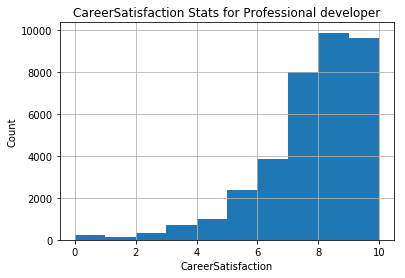

In [10]:
career_satis_df['CareerSatisfaction'][
    career_satis_df['Professional']=='Professional developer'].hist(bins=10);
plt.title('CareerSatisfaction Stats for Professional developer');
plt.xlabel('CareerSatisfaction');
plt.ylabel('Count');

In [11]:
job_satis_df[job_satis_df['Professional']=='Professional developer'].groupby(
    ['ProgramHobby']).median()['CareerSatisfaction'].sort_values()

ProgramHobby
No                                           7.0
Yes, I contribute to open source projects    8.0
Yes, I program as a hobby                    8.0
Yes, both                                    8.0
Name: CareerSatisfaction, dtype: float64

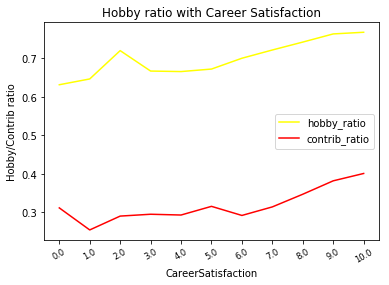

In [12]:
career_satis_df = df[df['CareerSatisfaction'].isnull() == False]
hobby_ratios_df2 = sh.gen_hobby_ratios_df_by_satis('CareerSatisfaction',
                                                   career_satis_df)

x = np.arange(len(hobby_ratios_df2['satis']))

# Draw a line chart.
plt.plot(x, hobby_ratios_df2['hobby_ratio'], 'yellow')
plt.plot(x, hobby_ratios_df2['contrib_ratio'], 'red')
plt.xticks(x, hobby_ratios_df2['satis'], size='small',rotation=30)
plt.xlabel('CareerSatisfaction')
plt.ylabel('Hobby/Contrib ratio')
plt.title('Hobby ratio with Career Satisfaction')
plt.legend()
plt.show()

It is clear that career satisfaction is more relevant to programming hobby. Among users who are professional developers, the higher their career satisfaction, the more likely they are to make programming a hobby, and they will be more willing to contribute to open source projects. On the other hand, professional programmers who love programming are more likely to get a sense of satisfaction in their careers, especially for those who are willing to be contributors to open source projects.
This is the second conclusion that I have come to an analysis.

By the way, I don't think the part of the data that career satisfaction is `0` is valid. Because if they don't feel satisfied with their careers, it's basically impossible to be a professional developer. Professional developers who love programming and dedication will not be happy with their careers at all? I'm afraid that's not possible.

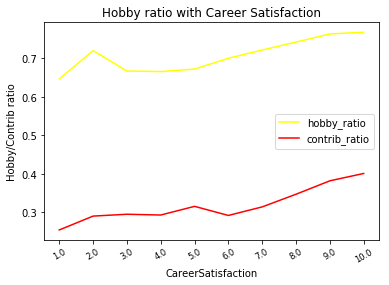

In [13]:
hobby_ratios_df2 = sh.gen_hobby_ratios_df_by_satis('CareerSatisfaction',
                                                   career_satis_df)

hobby_ratios_df2_2 = hobby_ratios_df2.drop(0.0)
x = np.arange(len(hobby_ratios_df2_2['satis']))

# Draw a line chart.
plt.plot(x, hobby_ratios_df2_2['hobby_ratio'], 'yellow')
plt.plot(x, hobby_ratios_df2_2['contrib_ratio'], 'red')
plt.xticks(x, hobby_ratios_df2_2['satis'], size='small',rotation=30)
plt.xlabel('CareerSatisfaction')
plt.ylabel('Hobby/Contrib ratio')
plt.title('Hobby ratio with Career Satisfaction')
plt.legend()
plt.show()